<a href="https://colab.research.google.com/github/HaaziqKazi/DronesStuff/blob/main/ColorMeImpressed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import cv2 as cv
import sys
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
img = cv.imread(cv.samples.findFile("/content/drive/MyDrive/open-cv imags/download.jpeg"))
if img is None:
    print('couldn\'t find img')
    sys.exit("Could not read the image.")

In [106]:
img2 = cv.imread(cv.samples.findFile("/content/drive/MyDrive/open-cv imags/crossing sign.png"))
if img is None:
    print('couldn\'t find img')
    sys.exit("Could not read the image.")

In [74]:
#cv2_imshow(img)#
#k = cv.waitKey(0)

In [75]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#cv2_imshow(gray)
#k = cv.waitKey(0)

In [76]:
blur = cv.GaussianBlur(gray, (3,3), cv.BORDER_DEFAULT)
#cv2_imshow(blur)
#k = cv.waitKey(0)

In [82]:
canny = cv.Canny(blur, 125, 175)
#cv2_imshow(canny)
k# = cv.waitKey(0)

-1

In [81]:
ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)
#cv2_imshow(thresh)
#k = cv.waitKey(0)

In [80]:
blank = np.zeros(img.shape, dtype='uint8')
#cv2_imshow(blank)
#k = cv.waitKey(0)

In [79]:
contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contours found!')

10 contours found!


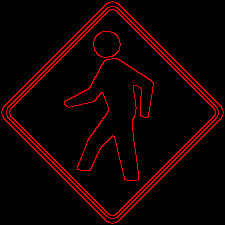

In [83]:
cv.drawContours(blank, contours, -1, (0,0,255), 1)
cv2_imshow(blank)
k = cv.waitKey(0)

In [84]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
H, S, V = cv.split(hsv)

#cv2_imshow(H)  # Hue channel (0..179)
#cv2_imshow(S)  # Saturation
#cv2_imshow(V)  # Value (brightness)

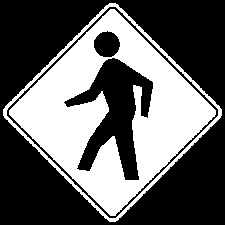

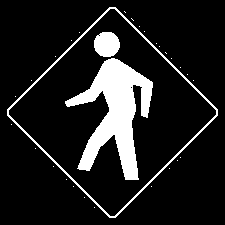

In [85]:
yellow_lo = (15, 80, 60)
yellow_hi = (40, 255, 255)

# This catches the silhouette + black border.
black_lo  = (0, 0, 0)
black_hi  = (179, 255, 80)

yellow_mask = cv.inRange(hsv, yellow_lo, yellow_hi)
black_mask  = cv.inRange(hsv, black_lo, black_hi)

cv2_imshow(yellow_mask)  # raw yellow mask
cv2_imshow(black_mask)   # raw black mask

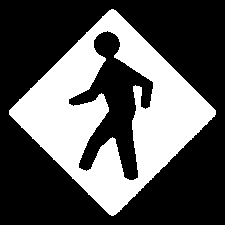

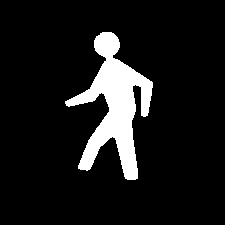

In [86]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
yellow_clean = cv.morphologyEx(yellow_mask, cv.MORPH_OPEN, kernel, iterations=1)
yellow_clean = cv.morphologyEx(yellow_clean, cv.MORPH_CLOSE, kernel, iterations=2)

black_clean = cv.morphologyEx(black_mask, cv.MORPH_OPEN, kernel, iterations=1)
black_clean = cv.morphologyEx(black_clean, cv.MORPH_CLOSE, kernel, iterations=1)

cv2_imshow(yellow_clean)
cv2_imshow(black_clean)

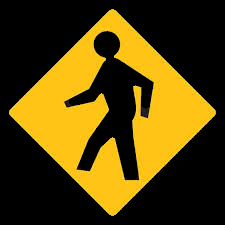

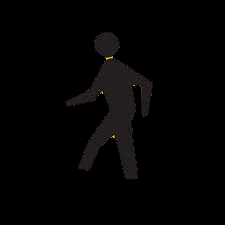

In [87]:
# Yellow area only
yellow_only = cv.bitwise_and(img, img, mask=yellow_clean)
# Black area only
black_only  = cv.bitwise_and(img, img, mask=black_clean)

cv2_imshow(yellow_only)
cv2_imshow(black_only)

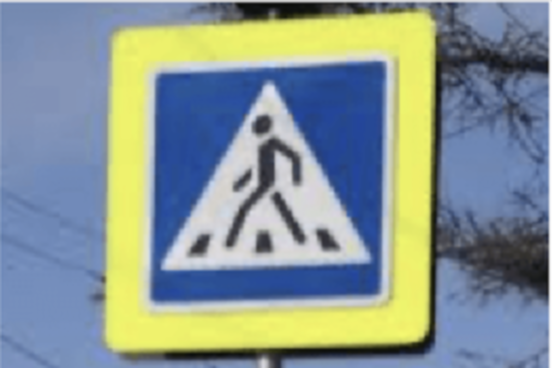

In [107]:
img_blur = cv.GaussianBlur(img2, (5,5), 0)
cv2_imshow(img_blur)

In [112]:
# Convert to lab
lab = cv.cvtColor(img_blur, cv.COLOR_BGR2LAB)

# Prepare kmeans
Z = lab.reshape((-1, 3)).astype(np.float32)

# K is number of color regions to find, 3-6 is ok
K = 4
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 1.0)

compactness, labels, centers = cv.kmeans(
    Z, K, None, criteria, 5, cv.KMEANS_PP_CENTERS
)

labels = labels.reshape(lab.shape[:2])
centers = centers.astype(np.uint8) # this was recommended by colab lol

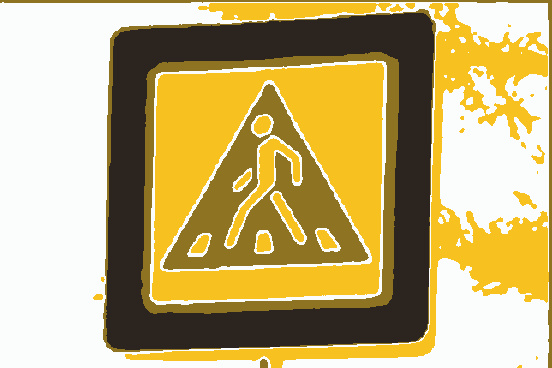

In [113]:
h, w = labels.shape
vis = np.zeros((h, w, 3), dtype=np.uint8)
for k in range(K):
    vis[labels == k] = centers_bgr[k]
cv2_imshow(vis)

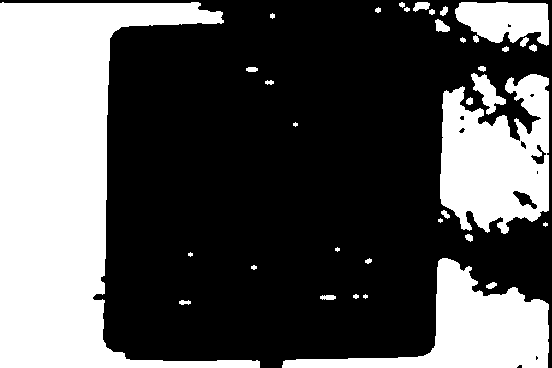

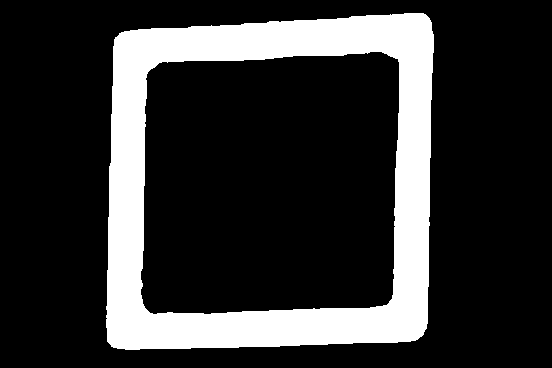

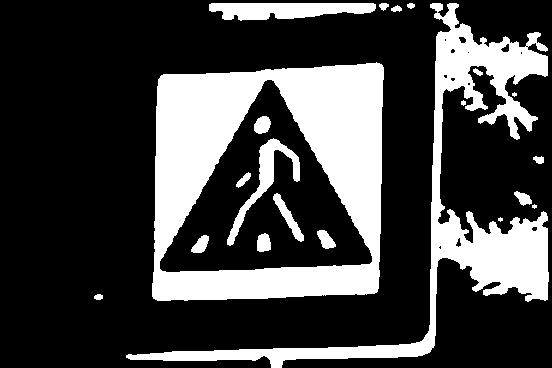

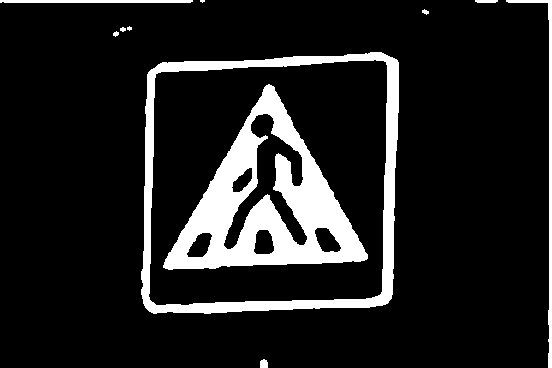

In [114]:
cluster_masks = []
for k in range(K):
    mask = np.zeros(labels.shape, np.uint8)
    mask[labels == k] = 255
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
    mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel, iterations=1)
    cluster_masks.append(mask)
    cv2_imshow(mask)  # one frame per cluster